In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb

In [2]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 2.

}

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(cosmomc_theta=params['cosmomc_theta'], ombh2=params['ombh2'], omch2=params['omch2'], mnu=0.0, omk=0, \
                   tau=params['tau'])
pars.InitPower.set_params(As=params['As'], ns=params['ns'], r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81050087]


In [31]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'save_dwsmpld': True,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200m'}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D

 Nz for higher resolution =  249
0 1972.6418087064476
1 905.7469883242062
2 134.832788120195
3 12.452224701626658


Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 2: 377.2698086785764.
Number of clusters in redshift bin 2: 377.2698086785764.
Number of clusters in redshift bin 2: 377.2698086785764.
Number of clusters in redshift 

Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.225536265958027

4 0.5594845944593895
5 0.008629548608595725
 Total predicted 2D N =  3026.2419239955434
 ::: 2D ln likelihood =  348.83825861263415


array([-348.83825861])

In [32]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [33]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq_ccl = np.zeros(len(q))
catNq_ccl = np.zeros(len(q))
for i in range(len(q)):
    Nq_ccl[i] = Nzq[:,i].sum()    
    catNq_ccl[i] = catNzq[:,i].sum()

0 1972.6418087064476
1 905.7469883242062
2 134.832788120195
3 12.452224701626658


Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 0: 16.17815472706036.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 1: 185.6961851972779.
Number of clusters in redshift bin 2: 377.2698086785764.
Number of clusters in redshift bin 2: 377.2698086785764.
Number of clusters in redshift bin 2: 377.2698086785764.
Number of clusters in redshift 

Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 20: 0.6584783714131353.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 21: 0.3842157385422115.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.2255362659580278.
Number of clusters in redshift bin 22: 0.225536265958027

4 0.5594845944593895
5 0.008629548608595725
 Total predicted 2D N =  3026.2419239955434


In [22]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 2.

}

path2data = path2data

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "camb",
        'massfunc_mode': 'internal',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'average_Q': False,
        'save_dwsmpld': True,
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

[camb] `camb` module loaded successfully from /usr/local/anaconda3/envs/cluster_counts_environment/lib/python3.8/site-packages/camb
 Nz for higher resolution =  249
0 1969.4201488610574
1 903.9471825115735
2 134.6040587187721
3 12.455586575640222
4 0.5626195750858668
5 0.008786590662723711
 Total predicted 2D N =  3020.998382832792
 ::: 2D ln likelihood =  347.4086254679978


array([-347.40862547])

In [23]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [24]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

0 1969.4201488610574
1 903.9471825115735
2 134.6040587187721
3 12.455586575640222
4 0.5626195750858668
5 0.008786590662723711
 Total predicted 2D N =  3020.998382832792


In [25]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

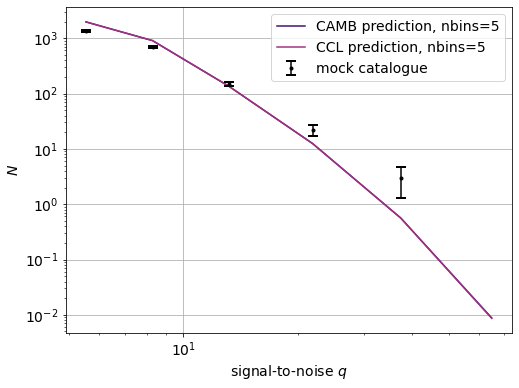

In [26]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

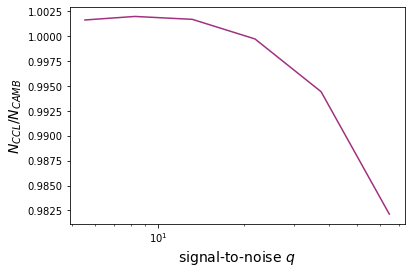

In [27]:
plt.semilogx(q, Nq_ccl/Nq, color=color_list[6])
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{CCL}/N_{CAMB}$', fontsize=14)
plt.show()

In [49]:

datafile_Q_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/QFitdwsmpld_nbins=2.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/RMSTabdwsmpld_nbins=2..npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

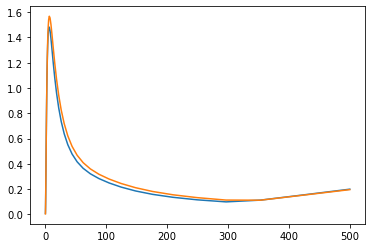

In [53]:
plt.plot(tt500,allQ[:,0])
plt.plot(tt500,allQ[:,1])
plt.show()

In [55]:
np.shape(tt500)
tt500.size

51

In [51]:
noise

array([1.21983105e-05, 2.24063219e-05])

In [59]:
skyfracs/rad_in_deg2/41253.

array([0.1983661 , 0.12188687])

In [56]:
rad_in_deg2 = (np.deg2rad(1.))**2.
# np.savetxt(path_to_catalogue+'so_3freqs_191121_theta500arcmin_Q.txt',np.c_[tt500,Q])
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'
np.savetxt(path_to_save+'advact_dr5_skyfracs_300621.txt',np.c_[skyfracs/rad_in_deg2/41253.])

In [57]:
so_skyfracs = np.loadtxt(path_to_save+'advact_dr5_skyfracs_300621.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'advact_dr5_ylims_300621.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'advact_dr5_thetas_300621.txt',np.c_[tt500])